# EMAT31530 Introduction to Artificial Intelligence
## Worksheet 2 Regression and Classification

This worksheet will consist of two parts
* we will pick up where we left off last week, by modifying our setup such 
that we measure the ability of our linear regressor to generalise to unseen data.
* we will cover classification models, where instead of predicting a numeric label, we are predicitng a category.

Our first task is to catchup to where we left off last week. The code below will get us there. Make sure you understand it, and understand the previous worksheet, before continuing.

In [2]:
# lets make sure we are on the right version of scikit-learn
# !pip install scikit-learn==0.22.2.post1
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import numpy as np
boston = datasets.load_boston()
X = boston.data
y = boston.target

nox = X[:,[4]]
num_rooms = X[:,[5]]

In [3]:
def produce_linear_plot(x, y):
  model = LinearRegression()
  model.fit(x, y)
  predictions = model.predict(x)
  print("The first 5 predictions are %s" % predictions[:5])
  print("The first 5 true values are %s" % y[:5])
  plt.scatter(x, y)
  plt.plot(x, predictions, color='green', linewidth=3)
  return predictions

## Part 1 (Generalisation)
Last week we covered building linear regression models for two features, visualising the fit, and then calculating the MSE. However, this week in lectures we covered the importantance of generalisation, and the importantance of 'withholding' some data from the model during the training process so we can use it to measure the ability of the model to accurately predict the classes (labels, y) of this witheld data (the test set).

As usual, scikit-learn has a helpful function for generation a train and test set. On line 1 below we import that function and on line 2 we generate a train and test split for the nox feature, where 25% of the data is used for the test set, and the other 75% for the training set.

random_state just ensures that we take the same split each time - it is useful for ensuring reproducible results.

### Producing predictions on a test set
If you have correctly wrote the code, you should see some predictions when you run the code below.

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(nox, y, test_size=0.25, random_state=0,)

Unfortunately, our produce_linear_plot function isn't suitable for this setup, since it assumes you train (fit) and test (predict) on the same data - which is rarely what we want to do. 

**Task: implement the function below. The function should do 3 things.**

*   It should expect to receive not just 'x' and 'y' as parameters, but train_X, test_X, train_y and test_y as parameters.

*   It should then create an instance of a Linear Regresion model.

* It should then fit this model using the training data.

* Finally, it should make predictions on the test data, and return those predictions.


In [5]:
def produce_predictions_linear_regression(train_X, test_X, train_y, test_y):
    model = LinearRegression()
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    print("The first 5 predictions are %s" % predictions[:5])
    print("The first 5 true values are %s" % test_y[:5])
#     plt.scatter(test_X, test_y, color='green')
#     plt.scatter(test_X, predictions, color='red')

    mse = mean_squared_error(test_y, predictions)
    return predictions, mse

In [6]:
nox_predictions, nox_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)


The first 5 predictions are [26.07396957 19.91176827 22.83070573 17.67751985 26.90280366]
The first 5 true values are [22.6 50.  23.   8.3 21.2]


If it works, you should see output when you run the above cells similar to:



```
The first 5 predictions are [26.07396957 19.91176827 22.83070573 17.67751985 26.90280366]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
```



### Calculating the performance on the test set
Great, so we can now train a model, produce predictions on a test set.

As we done in the last worksheet, let's calculate the mean squared error. This will tell us how close our models predictions on the test set are to the true values.


**Task: Use the predictions returned from our new function (produce_predictions_linear_regression) to calculate the MSE on the test data.**

In [7]:
print('Mean squared error on the the test set: %.2f' % nox_mse )

Mean squared error on the the test set: 72.83


You should see output similar to the below

`Mean squared error on the test set 72.83`

OK, so we can see that the mean squared error when using the nox feature to predict the house prices on the test set is pretty high.

**Task: calculate the test set mean squared error of the num_rooms feature**

In [8]:
train_X, test_X, train_y, test_y = train_test_split(num_rooms, y, test_size=0.25, random_state=0,)
num_rooms_predictions, num_rooms_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)

print('Mean squared error on the test set %.2f' % num_rooms_mse )

The first 5 predictions are [22.7979148  21.70829974 23.17043277 13.63397276 21.85730693]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
Mean squared error on the test set 43.47


You should see output similar to the below



```
The first 5 predictions are [22.7979148  21.70829974 23.17043277 13.63397276 21.85730693]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
Mean squared error on the test set 43.47
```



Cool, it appears that even with the test set, a linear regression model trained on the number of rooms has a lower mean squared error than a model trained on the nox feature.

### Multiple Linear Regression
So far we have been building linear regressors on single features (either nox or num_rooms). However, rarely would we want to do this. Instead, we usually have more features available and thus would want to build a model (linear regressor or otherwise) that uses more than one feature.

**Task: To do this, create a train_test_split using *all* of our features X.**


In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0,)

Let's print out the first row of training data, to make sure it looks like what we expect.

In [10]:
print('The first row of data in the training set is %s' % train_X[0])

The first row of data in the training set is [1.9133e-01 2.2000e+01 5.8600e+00 0.0000e+00 4.3100e-01 5.6050e+00
 7.0200e+01 7.9549e+00 7.0000e+00 3.3000e+02 1.9100e+01 3.8913e+02
 1.8460e+01]


It should look something like below:



```
The first row of data in the training set is [1.9133e-01 2.2000e+01 5.8600e+00 0.0000e+00 4.3100e-01 5.6050e+00
 7.0200e+01 7.9549e+00 7.0000e+00 3.3000e+02 1.9100e+01 3.8913e+02
 1.8460e+01]
```




**Task: calculate the mean squared error on the test set when using all of the features**


In [11]:
# your code here
all_predictions, all_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)
print('Mean squared error on the test set %.2f' % all_mse )

The first 5 predictions are [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
Mean squared error on the test set 29.78


It should look something like below:

```
Mean squared error on the test set 29.78
```

Finally, let's create a bar chart showing the MSE of each model (a model using only the NOX feature, a model using only the num_rooms feature, and a model using all of the features.

Ensure that the 3 variables storing your mse values are the same as the variable names below.

The first 5 predictions are [26.07396957 19.91176827 22.83070573 17.67751985 26.90280366]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
The first 5 predictions are [22.7979148  21.70829974 23.17043277 13.63397276 21.85730693]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
The first 5 predictions are [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]
The first 5 true values are [22.6 50.  23.   8.3 21.2]


Text(0, 0.5, 'MSE')

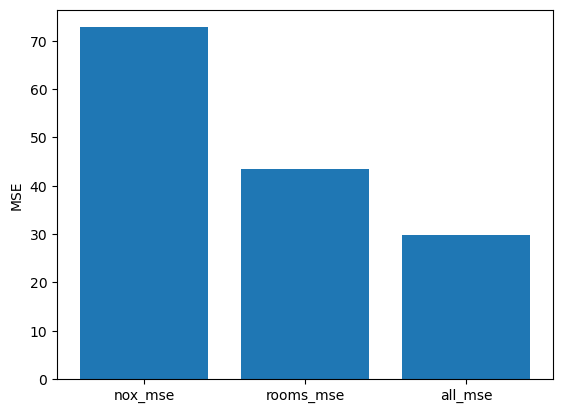

In [12]:
variables = [X[:,[4]], X[:,[5]], X]
labels = ['nox_mse', 'rooms_mse', 'all_mse']
mses = []

for var in variables:
    train_X, test_X, train_y, test_y = train_test_split(var, y, test_size=0.25, random_state=0,)
    predictions, mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)
    
    mses.append(mse)


import numpy as np
y_pos = np.arange(len(mses))

plt.bar(y_pos, mses)
plt.xticks(y_pos, labels)
plt.ylabel('MSE')


## Part 2 (Classification)

Regression models are great when you are trying to predict some sort of number, but if you are interested in predicting a category or discrete label (which is often the case), then classification models are more suitable. 

### The Titanic
The Titanic, deemed unsinkable, sunk during it maiden, and only, voyage from Southampton to New York City in 1912, by colliding with an ice berg.

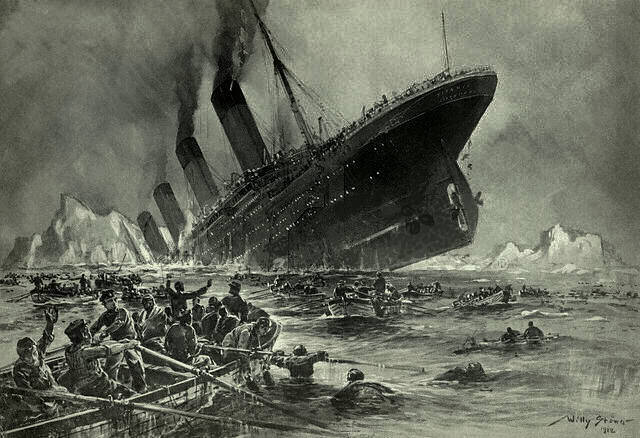

*Untergang der Titanic by Willy Stöwer, 1912, Wikipedia.*

Below, we will investigate the following
* we will use a dataset of around 800 passengers on the Titanic, with some information about each, including whether they survived.
* using this dataset we will try two models covered in the unit so far, perceptrons and decision trees, and compare their performance at predicting whether passengers survived the titanic.
* we will try and use appropiate regularisation for each model to see if we can further improve the perfomance of the model.

The first thing to do is download the data. I have hosted the CSV at the URL below, which we can read over the Internet using the pandas pd.read_csv function. 

In [15]:
import pandas as pd
dff = pd.read_csv('titanic.csv')

### Data Preprocessing
Let's print out the pandas dataframe and see what it looks like. As you hopefully recall from the introduction worksheet, you can print out the first rows of a dataframe with the 'head' method.

**Task: use the head method to print out the first 5 rows of the dataframe.**

In [16]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What you should see above is that there are a number of different features in this dataset. Each row corresponds to a single person on the titanic.

The 'Survived' feature looks particularly interesting from a classification point of view - we will consider this a binary classification task where we want to predict if a passenger surived the titanic, based on other features recorded about them (such as their class 'Pclass', their 'Fare' and so on)

**Task: Extract the 'Survived' column from the dataframe as our target variable, or 'y'**

In [73]:
y = dff.Survived.replace(0, -1)

Now let us see which features are available in the data.

In [18]:
print(dff.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


From this quick investigation, there are two questions I want you to consider.

1.   Why should we not use the PassengerId and Name features?
2.   Will a model know how to handle the 'Sex' feature given it is a string ('male' or 'female')?

### One hot encoding

Recall from the lectures that we often have to preprocess nominal or discrete data such as strings of text.

Pandas has a method called 'get_dummies' where it will automatically generate 'one hot encoded' features from the 'Sex' feature so it can be used in our models.

In [19]:
df=pd.get_dummies(dff, columns=['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


OK, how we have one hot encoded the 'Sex' column, we can move forward and select the features we want to use for classifying whether someone will survive.

In the below code we extract from the pandas dataframe a set of features into our X variable.

In [20]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']]
X.tail()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
886,2,27.0,0,0,13.00,0,1
887,1,19.0,0,0,30.00,1,0
888,3,NaN,1,2,23.45,1,0
889,1,26.0,0,0,30.00,0,1
890,3,32.0,0,0,7.75,0,1


**Task: The above code doesn't include our newly created one hot encoded Sex_male and Sex_female features, so modify the code above to also include it.**

Once done, print the 'tail' of the selected features in X to check it worked. It should have a column called 'Sex_female' and 'Sex_male'.


Unfortunately, from above,  it looks like some of our data has 'nan' values, or 'not a number' values. This is very common in real world data, and we need to make a decision about how we handle data with missing values as most classifiers will work with them. There are many strategies, but we will take the most straightforward for now, we will simply replace any NaNs with the mean value of that feature from the remaining data.

In [21]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

/tmp/ipykernel_33077/1044914109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())


### Implementing the Perceptron classifier
Hopefully you have watched (and also implemented) a Perceptron classifier, with the videos from week 2, so we know how it works. Let's use the scikit-learn implementation now, which has a few more features (which we will use later).
You can read the documentation for the model here: https://scikit-learn.org/0.22/modules/generated/sklearn.linear_model.Perceptron.html


In [22]:
from sklearn.linear_model import Perceptron

**Task: the first thing we should do is create our train test splits. You do this the same as before. Set the test_size to be 0.25 and random_state to be 0.**

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

Now that we have our train and test splits, we should instantiate a Perceptron  classifier with the hyperparameters we want.

**Task: Create a perceptron classifier object with random_state=0, max_iter=100 and tol=0.001**

max_iter is the maximum number of iterations over the training data, while tol specifies the change threshold of the loss. Training will stop when (loss > previous_loss - tol).

In [24]:
clf = Perceptron(max_iter=100, tol=0.0001, random_state=0)

Next we will call the fit function of our Perceptron classifier, which will train the classifier (learn the weights of the model) on the training data.

**Task: fit the perceptron to the training data**


In [25]:
clf.fit(train_X, train_y)

Perceptron(max_iter=100, tol=0.0001)

Once we have called fit on our model, we can call the predict function of the model with data that we would like to make predictions for.

**Task: produce predictions for the test data using the trained classifier**

In [26]:
predictions = clf.predict(test_X)

Since this is classification task, we can calculate the accuracy of the model by comparing for each data point, if the model predicted the correct class.

Previously we used from sklearn.metrics the 'mean_squared_error'. Have a look at the sklearn metrics documentation and import the metric to calculate the accuracy of our classification model (https://scikit-learn.org/0.22/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

This metric corresponds to the following:
$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

This metric will go through each of your predictions produced by your classifer, and counts the number of times the class predicted is the same as the class in your ground truth ('y'/'test_y')

**Task: calculate the accuracy of your classifer on the test set**

In [27]:
from sklearn.metrics import accuracy_score

test_acc_perceptron = accuracy_score(test_y, predictions)

print('The accuracy of the perceptron classifier on the test set is %.2f' % test_acc_perceptron)

The accuracy of the perceptron classifier on the test set is 0.70


### Measuring bias/variance
In the lectures we discussed bias and variance and how this manifests in the training and test error. Let's write a function that produces a plot of the train and test error. 

This function will take as arguments the training accuracy and testing accuracy, and display a bar chart of the respective errors.


In [28]:
def plot_train_test(train_acc, test_acc):
    error = [1-train_acc, 1-test_acc]
    labels = ['train error', 'test error']
    y_pos = np.arange(len(error))

    plt.bar(y_pos, error)
    plt.xticks(y_pos, labels)
    plt.ylabel('Error')
    plt.ylim([0,1])
    plt.show()

However, so far we have only calculated the accuracy on the test set. This is normally what we are interested in. We want to know how well the model performs on unseen data. However, if we are investigating the bias and variance of our model, or if our model is underfitting or overfitting, we may want to also know the training error too. 

**Task: calculate the training error.**

In [29]:
predictions = clf.predict(train_X)
train_acc_perceptron = accuracy_score(train_y, predictions)
print('The accuracy of the perceptron classifier on the training set is %.2f' % train_acc_perceptron)

The accuracy of the perceptron classifier on the training set is 0.71


Now that we have our training accuracy and testing accuracy, we can call our function to create the bar chart.

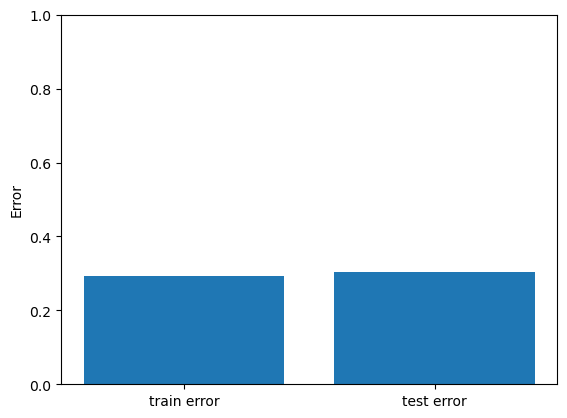

In [30]:
plot_train_test(train_acc_perceptron, test_acc_perceptron)

### Implementing the Decision Tree classifier
In the lectures we also covered Decision Trees. Thankfully, scikit-learn also has a decision tree model built in, so lets use that. Have a look at the documentation here, and similarly to other models, import the decision tree classifier: https://scikit-learn.org/0.22/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Task: import the Decision Tree Classifier from scikit-learn**

In [31]:
from sklearn.tree import DecisionTreeClassifier

We follow the same pattern with this classifier as we did with the last, we first instantiate the model (clf = DecisionTree()), then we use the 'fit' function of the model on the training data to train the model, followed by calling 'predict' with datapoints in order to produce predictions of the class for each of those data points. Once we have these, we can calculate the accuracy.

**Task: calculate the train and test accuracy of the decision tree classifier**

To do this you must:


*   create the decision tree classifier (name it dec_tree_clf), with random_state 0, and using entropy as the criterion.
*   train the classifier on the training data, and produce predictions on the same data, before calculating the accuracy on the training set.
*  using the same classiifer, produce predictions for the test set, and calculate the test set accuracy.
*   call the plot_train_test function from earlier to visualise the performances.





In [32]:
def plot_errors(data, labels):
    error = [1 - x for x in data]

    y_pos = np.arange(len(error))

    plt.bar(y_pos, error)
    plt.xticks(y_pos, labels)
    plt.ylabel('Error')
    plt.ylim([0,1])
    plt.show()

In [33]:
def calc_accuracy(dec_tree_clf, label, train_X, train_y, data):
    dec_tree_clf.fit(train_X, train_y)
    train_predictions = dec_tree_clf.predict(train_X)
    train_acc_tree = accuracy_score(train_y, train_predictions)

    test_predictions = dec_tree_clf.predict(test_X)
    test_acc_tree = accuracy_score(test_y, test_predictions)

    data.append([label, train_acc_tree, test_acc_tree])
    
    return data

In [34]:
import plotly.graph_objects as go

def generate_comparison(df):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df.Label,
        y=df.Train_acc,
        name='Training Accuracy',
        marker_color='indianred'
    ))
    fig.add_trace(go.Scatter(
        x=df.Label,
        y=df.Test_acc,
        name='Test Accuracy',
        marker_color='lightsalmon'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()

In [74]:
# Max depth
data, labels = [], []
dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
data = calc_accuracy(dec_tree_clf,'Base', train_X, train_y, data)

for mi in range(5):
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=mi+8)
    label = 'max_depth = ' + str(mi+8)
    ndata = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)
    
for fi in range(5):
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_features=fi+3)
    label = 'max_features = ' + str(fi+3)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

for i in range(5):
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_leaf_nodes=(i+4)*5)
    label = 'max_leaf_nodes = ' + str((i+4)*5)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)
    
for i in range(5):
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=i+8)
    label = 'Min samples per leaf = ' + str(i+8)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

for i in range(5):
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=i+3)
    label = 'min_samples_split = ' + str(i+3)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=10, max_leaf_nodes=40,
                                      min_samples_split=12, max_depth=10, max_features=5)
data = calc_accuracy(dec_tree_clf,'Regularised', train_X, train_y, data)


df = pd.DataFrame(data, columns = ['Label', 'Train_acc', 'Test_acc'])
generate_comparison(df)    
idmax = df.Test_acc.idxmax()
df.iloc[idmax]
dec_tree_acc = df.Test_acc[0]
dec_tree_acc_reg = df.iloc[-1].Test_acc
# df.tail()

### Regularising a decision tree classifier
OK, now try and apply some regularisation to the dataset in order to improve the accuracy of the model. 
Have a look at the parameters for the model here (https://scikit-learn.org/0.22/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
and identify which parameters may regularise the model, and try them.

**Task: Investigate and experiment with regularisation parameters, and store the accuracy of the resulting model in a new variable `test_acc_dec_tree_reg'.**


**Increasing min_* hyperparameters or reducing max_* hyperparameters will regularise model**

In [37]:
dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=10)
dec_tree_clf.fit(train_X, train_y)

test_predictions = dec_tree_clf.predict(test_X)
test_acc_dec_tree_reg = accuracy_score(test_y, test_predictions)


A useful property of decision trees are that (for small ones at least), is that it is possible to visualise them. The code below should produce a tree representing the learned decision tree.

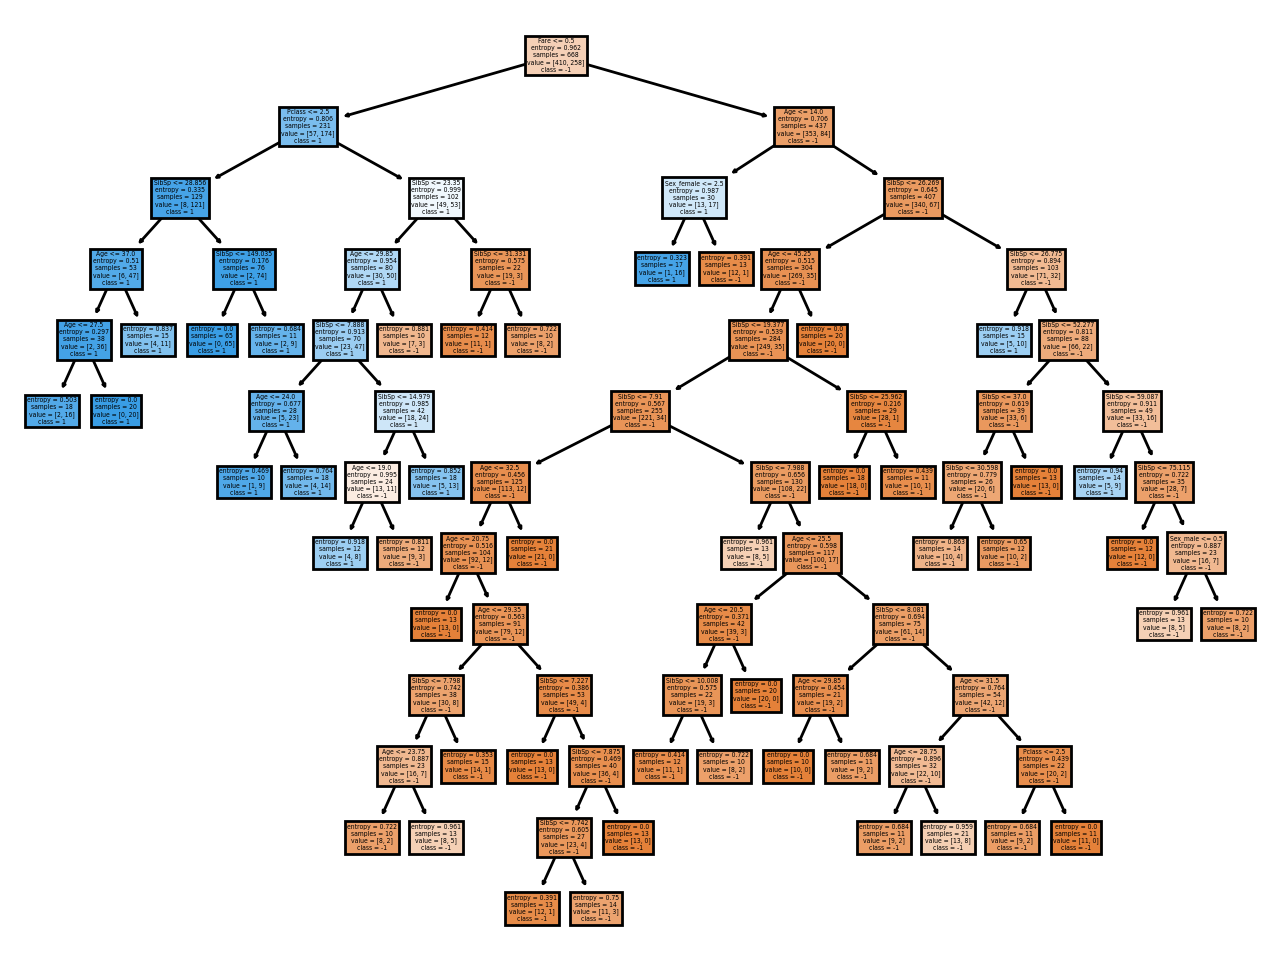

In [38]:
from matplotlib.pyplot import figure
import plotly.express as px
figure(figsize=(8, 6), dpi=200)
from sklearn import tree
tree.plot_tree(dec_tree_clf, feature_names=['Pclass', 'Age', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Fare'], filled=True, class_names=y.astype(str))
plt.show()

### Regularising a Perceptron
 Have a look at the documentation for the perceptron (https://scikit-learn.org/0.22/modules/generated/sklearn.linear_model.Perceptron.html)

 **Task: Investigate and experiment with regularisation parameters, and store the accuracy of the resulting model in a new variable `test_acc_perceptron_reg'.**

In [39]:
def calc_accuracies(clf, train_X, train_y, test_X, test_y):
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(train_X)
    train_acc_tree = accuracy_score(train_y, train_predictions)

    test_predictions = dec_tree_clf.predict(test_X)
    test_acc_tree = accuracy_score(test_y, test_predictions)

    return train_acc_tree, test_acc_tree
    

In [66]:
label = []
data = []

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0)
label.append('base')
test_acc_perceptron, train_acc_perceptron = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron)

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='l1')
label.append('l1')
test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron_reg)

# perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='l2')
# label.append('l2')
# test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
# data.append(test_acc_perceptron_reg)

# perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='elasticnet')
# label.append('elasticnet')
# test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
# data.append(test_acc_perceptron_reg)

# for i in [0.01, 0.1, 0.3, 1, 10]:
#     perceptron_clf = Perceptron(max_iter=100, tol=i, random_state=0, penalty='elasticnet')
#     label.append('l1 alpha =' + str(i))
#     test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
#     data.append(test_acc_perceptron_reg)

plot_accuracies(data, label)

### Visualising the performance of all models
Finally, let's make a bar chart that plots the accuracy of our four models on the test set. Those models are
the original perceptron, the regularised perceptron, the original decision tree and the regularised decision tree.

To do this, you can modify the bar plotting function from earlier, which is included below. 

**Task: use this function to plot the accuracies of the four models. Use the code below to figure out which variables you need to pass to the function.**

In [64]:
def plot_accuracies(test_accuracies, model_names):
    dic = {'Model names': model_names, 'Accuracy': test_accuracies}
    df = pd.DataFrame(dic)
    fig = px.bar(df, x='Model names', y='Accuracy')
    fig.show()


In [65]:
accs = [dec_tree_acc, dec_tree_acc_reg, test_acc_perceptron, test_acc_perceptron_reg]
model_names = ['Decision tree', 'Decision tree regularised', 'Perceptron', 'Perceptron regularised']

plot_accuracies(accs, model_names)